In [144]:
using CSV, DataFrames, Plots, LsqFit, Random

In [145]:
function Gaussian(x, fwhm)
    σ = fwhm / (2√(2log(2)))
    return @. 1 / √(2π) / σ * exp(-x^2 / 2σ^2)
end

Gaussian (generic function with 1 method)

In [146]:
function Lorentzian(x, fwhm)
    γ = fwhm / 2
    return @. (γ / pi) / (x^2 + γ^2)
end

Lorentzian (generic function with 1 method)

In [147]:
function Pseudo_Voigt(x, fwhm, n)
    return n * Lorentzian(x, fwhm) + (1 - n) * Gaussian(x, fwhm)
end

Pseudo_Voigt (generic function with 1 method)

In [148]:
function peak(λ, λ₀, w, n, A)
    return @. A * Pseudo_Voigt(λ - λ₀, w, n)
end

peak (generic function with 1 method)

In [149]:
function background(λ, b₀, b₁, b₂)
    return @. b₀ + b₁*λ + b₂*λ^2
end

background (generic function with 1 method)

In [150]:
function ruby(λ, p)
    return peak(λ, p[1], p[2], p[3], p[4]) +
           peak(λ, p[5], p[6], p[7], p[8]) +
           background(λ, p[9], p[10], p[11])
end

ruby (generic function with 2 methods)

In [151]:
function plot_it(λ, y, Title)
    default(show = true)
    plt = plot(λ, y, title = Title, xlabel = "λ (nm)", ylabel = "Intensity (arb.)")
end

plot_it (generic function with 1 method)

In [152]:
function pressure(λ)
    A = 1904.0
    B = 7.665
    λ₀ = 693.29427
    return A/B * (((λ-λ₀)/λ₀ + 1)^B - 1)
end

pressure (generic function with 1 method)

In [153]:
df = DataFrame(CSV.File("0GPa.csv"))
λ = df[!,1];
y = df[!,2];

In [154]:
max_intensity = findmax(df[!, 2])
guess_a₁ = max_intensity[1]
guess_a₂ = 1.6 * guess_a₁
max_position = max_intensity[2]
guess_λ₂ = df[max_position[],1]
guess_λ₁ = guess_λ₂ - 1.58

p0 = [guess_λ₁, 2, 0.5, guess_a₁, guess_λ₂, 2, 0.5, guess_a₂, 0, 0, 0]

11-element Vector{Float64}:
   692.06862
     2.0
     0.5
 11064.572
   693.64862
     2.0
     0.5
 17703.3152
     0.0
     0.0
     0.0

In [155]:
fit = curve_fit(ruby, λ, y, p0)
param = fit.param

11-element Vector{Float64}:
   692.2258475908639
     0.40510403337677225
     0.1640446015408672
  2764.234942479126
   693.6585170999881
     0.5566760609883087
     0.3661081577341796
  6766.460453070655
 65024.11280208245
  -188.1769808642154
     0.13789100149009567

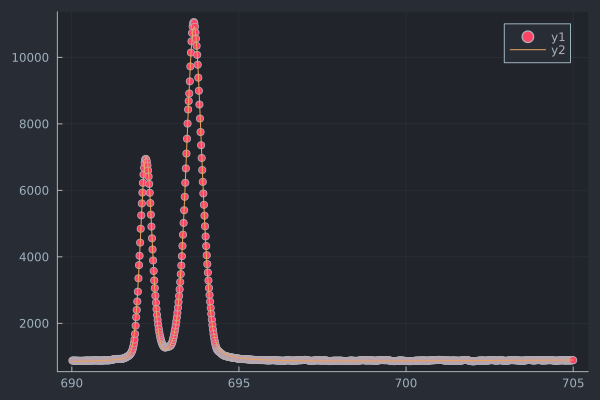

In [156]:
scatter(λ , y)
plot!(λ, ruby(λ, param))

In [157]:
p = pressure(param[5]) 

1.0020881087196656